In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

project_root = Path.cwd().parent
print(f"Project root: {project_root}")

Project root: /Users/david/Code/msc


In [6]:
# User input: run folder name
run_name = input("Enter the run name: ").strip()
run_folder = project_root / "runs" / run_name
distance_process_path = run_folder / "distance_process.csv"

if not distance_process_path.exists():
    raise FileNotFoundError(f"No distance_process.csv found at {distance_process_path}")

df = pd.read_csv(distance_process_path)
# Filter to z > 0 and sort by redshift for plotting
dfp = df[df["host_redshift"] > 0].sort_values("host_redshift").copy()
# Drop rows with non-finite distance moduli or residuals
valid = np.isfinite(dfp["mu_obs"]) & np.isfinite(dfp["mu_th"]) & np.isfinite(dfp["resid"])
dfp = dfp.loc[valid]
if len(dfp) < len(df):
    print(f"Dropped {len(df) - len(dfp)} row(s) with non-finite mu_obs/mu_th/resid.")
print(f"Loaded {len(dfp)} object(s) from {distance_process_path}")
dfp.head()

Loaded 9 object(s) from /Users/david/Code/msc/runs/test2/distance_process.csv


,ztf_id,host_redshift,ncall,ndof,chisq,t0,x0,x1,c,mB,mu_obs,mu_th,resid
8,ZTF19aacgslb,0.00452,109,102,27059.141176,58510.553073,0.077758,-0.083565,0.027194,13.281560,32.545559,31.441887,1.103672
5,ZTF19aabyheu,0.02100,153,42,1952.048270,58505.501110,0.004931,0.719589,0.197579,16.286003,35.134252,34.804508,0.329743
1,ZTF19aaairqh,0.02200,125,26,91.040120,58499.181571,0.002330,-0.081931,0.348817,17.110548,35.377746,34.907156,0.470591
2,ZTF19aaarhtg,0.02800,171,21,229.736749,59048.243524,0.000411,-3.552564,0.647035,19.024315,35.881147,35.440565,0.440582
6,ZTF19aabyppp,0.03700,121,40,965.773703,58508.504633,0.002750,0.424609,0.220524,16.943717,35.679537,36.060223,-0.380686


Saved to /Users/david/Code/msc/runs/test2/hubble_diagram.png


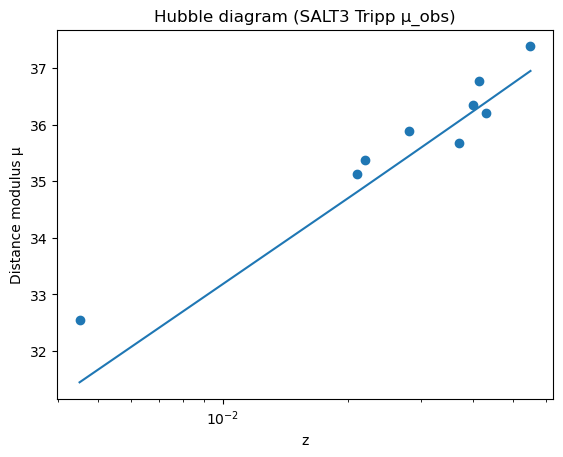

Saved to /Users/david/Code/msc/runs/test2/hubble_residuals.png


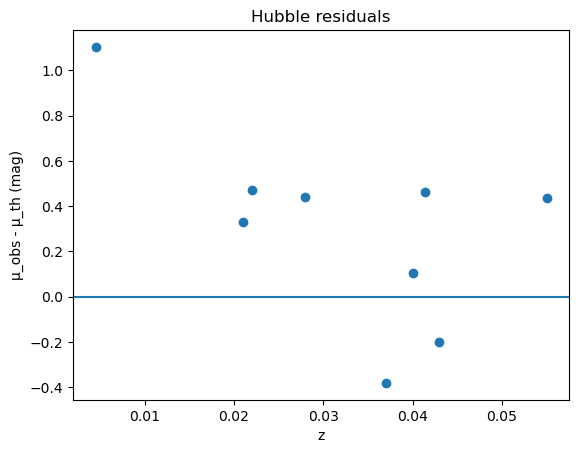

In [ ]:
# Hubble diagram: mu_obs vs z
plt.figure()
plt.xscale("log")
plt.scatter(dfp["host_redshift"], dfp["mu_obs"])
plt.plot(dfp["host_redshift"], dfp["mu_th"])  # model curve through same z points
plt.xlabel("z")
plt.ylabel("Distance modulus μ")
plt.title("Hubble diagram (SALT3 Tripp μ_obs)")
out_path = run_folder / "hubble_diagram.png"
plt.savefig(out_path, dpi=150)
print(f"Saved to {out_path}")
plt.show()

# Residuals
plt.figure()
plt.axhline(0)
plt.scatter(dfp["host_redshift"], dfp["resid"])
plt.xlabel("z")
plt.ylabel("μ_obs - μ_th (mag)")
plt.title("Hubble residuals")
resid_path = run_folder / "hubble_residuals.png"
plt.savefig(resid_path, dpi=150)
print(f"Saved to {resid_path}")
plt.show()